In [1]:
import sklearn
import scipy
import pycaret
import botorch
import torch
import gpytorch
import pandas as pd

In [2]:
df=pd.read_csv("../datagen/data_to_modeling.csv",sep='\t',index_col=0)
df

,material,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0,AISI_1045,0.25,1000,-7,5,261.158856,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1,AISI_1045,0.25,1000,-4,5,232.763364,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2,AISI_1045,0.25,1000,-1,5,209.399634,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3,AISI_1045,0.25,1000,2,5,215.371140,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4,AISI_1045,0.25,1000,5,5,222.345370,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,AISI_1020,0.25,4500,2,5,75.304756,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
499,AISI_1020,0.25,4500,5,5,73.459843,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
500,AISI_1020,0.25,4500,8,5,72.443460,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
501,AISI_1020,0.25,4500,11,5,73.213914,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280


In [3]:
ignore_features=["depth","clearance_angle",
"d1","d2","d3","d4","d5","densidade","young_modulus","poisson_coef","material"] #devido a erro no pycaret, vou fazer exclusão forçada das variáveis
df_1=df.drop(ignore_features,axis=1)

In [4]:
df_1.isna().any()

vc                    False
rake_angle            False
expected_cut_force    False
A                     False
B                     False
C                     False
n                     False
m                     False
dtype: bool

In [5]:
for mat in df["material"].unique():
    print(list(df[df["material"]==mat][["material","depth","vc","rake_angle","clearance_angle","expected_cut_force",
                        "A","B","C","n","m"]].iloc[[2]].values))
    

[array(['AISI_1045', 0.25, 1000, -1, 5, 209.3996337890626, 553.0, 600.0,
       0.0134, 0.234, 1.0], dtype=object)]
[array(['AISI_4140', 0.25, 1000, -4, 5, 1147.44189453125, 595.0, 580.0,
       0.023, 0.133, 1.03], dtype=object)]
[array(['AISI_4340', 0.25, 1000, -4, 5, 584.8319091796877, 792.0, 510.0,
       0.014, 1.03, 0.26], dtype=object)]
[array(['AISI_52100', 0.25, 1000, -4, 5, 253.8834747314454, 774.78, 134.0,
       0.0018, 0.37, 3.171], dtype=object)]
[array(['AISI_304', 0.25, 1000, -4, 5, 739.4136962890625, 310.0, 1000.0,
       0.07, 0.65, 1.0], dtype=object)]
[array(['AISI_1020', 0.25, 1000, -4, 5, 80.56342620849611, 213.0, 53.0,
       0.0055, 0.34, 0.81], dtype=object)]


In [6]:
df

,material,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0,AISI_1045,0.25,1000,-7,5,261.158856,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1,AISI_1045,0.25,1000,-4,5,232.763364,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2,AISI_1045,0.25,1000,-1,5,209.399634,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3,AISI_1045,0.25,1000,2,5,215.371140,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4,AISI_1045,0.25,1000,5,5,222.345370,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,AISI_1020,0.25,4500,2,5,75.304756,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
499,AISI_1020,0.25,4500,5,5,73.459843,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
500,AISI_1020,0.25,4500,8,5,72.443460,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
501,AISI_1020,0.25,4500,11,5,73.213914,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280


# Configurando diferentes setups


|Setup|polynomial_features|normalize|pca|transform_target|remove_multicollinearity|feature_selection|n_features_to_select|
|-|-|-|-|-|-|-|-|
|1|False|False|False|False|True|False|-|
|2|True|True|False|False|True|False|-|
|3|True|True|True|False|True|True|5|
|4|True|True|False|True|True|True|10|
|5|True|True|True|True|True|True|10|

In [7]:
from pycaret.regression import *


setup_1 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False,
          normalize=False,
          
          pca=False,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=False,
          feature_selection_method="univariate",
          n_features_to_select=6
)

setup_2 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False,
          normalize=True,
          
          pca=False,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=False,
          feature_selection_method="univariate",
          n_features_to_select=6
)

setup_3 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,
          
          pca=True,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

setup_4 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,
          
          pca=False,
          pca_method="linear", #kernel,

          transform_target=True,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

setup_5 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,
          
          pca=True,
          pca_method="linear", #kernel,

          transform_target=True,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

,Description,Value
0,Session id,8920
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 8)"
4,Transformed data shape,"(431, 19)"
5,Transformed train set shape,"(301, 19)"
6,Transformed test set shape,"(130, 19)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,521
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 8)"
4,Transformed data shape,"(431, 20)"
5,Transformed train set shape,"(301, 20)"
6,Transformed test set shape,"(130, 20)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,6021
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 8)"
4,Transformed data shape,"(431, 6)"
5,Transformed train set shape,"(301, 6)"
6,Transformed test set shape,"(130, 6)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,1833
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 8)"
4,Transformed data shape,"(431, 6)"
5,Transformed train set shape,"(301, 6)"
6,Transformed test set shape,"(130, 6)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,7281
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 8)"
4,Transformed data shape,"(431, 6)"
5,Transformed train set shape,"(301, 6)"
6,Transformed test set shape,"(130, 6)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,None


# Modelagem com expansão nas features

In [8]:
setup_1.compare_models(include=["gbr","lightgbm","lr","lasso","dt","dummy"])
setup_2.compare_models(include=["rf","gbr","lightgbm","lr","lasso","dt","dummy"])
setup_3.compare_models(include=["rf","gbr","lightgbm","lr","lasso","dt","dummy"])
setup_4.compare_models(include=["rf","gbr","lightgbm","lr","lasso","dt","dummy"])
setup_5.compare_models(include=["rf","gbr","lightgbm","lr","lasso","dt","dummy"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,31.9984,2626.8133,50.7801,0.9792,0.0901,0.0661,0.2730
gbr,Gradient Boosting Regressor,31.0610,2733.0500,51.7226,0.9782,0.0887,0.0630,0.3350
lr,Linear Regression,44.3943,4754.3823,67.7817,0.9597,0.1590,0.1178,0.0060
lasso,Lasso Regression,44.5836,4780.9363,68.0047,0.9595,0.1583,0.1171,0.0050
dt,Decision Tree Regressor,39.9289,5619.9650,72.2494,0.9509,0.1290,0.0781,0.0050
dummy,Dummy Regressor,323.7213,139005.0039,369.5637,-0.0651,0.9394,1.4641,0.0040


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,30.4256,3244.8252,53.8656,0.9749,0.0902,0.0600,0.0320
gbr,Gradient Boosting Regressor,33.3426,3423.3645,56.5480,0.9738,0.0981,0.0672,0.0160
lightgbm,Light Gradient Boosting Machine,34.6715,3656.9314,57.9050,0.9718,0.0974,0.0690,0.1340
lr,Linear Regression,38.3066,4061.7880,62.5058,0.9692,0.1207,0.0882,0.0070
lasso,Lasso Regression,39.1113,4099.5599,62.9486,0.9690,0.1202,0.0876,0.0050
dt,Decision Tree Regressor,39.3133,6095.0082,74.1275,0.9541,0.1304,0.0769,0.0050
dummy,Dummy Regressor,329.0185,140769.7648,374.3672,-0.0335,0.9558,1.4963,0.0050


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,44.1217,6065.2464,77.1181,0.9520,0.1386,0.0930,0.0280
lightgbm,Light Gradient Boosting Machine,47.4598,6445.4024,78.2476,0.9492,0.1490,0.1088,0.1740
gbr,Gradient Boosting Regressor,47.8890,6567.6477,79.4358,0.9472,0.1579,0.1084,0.0150
dt,Decision Tree Regressor,53.8024,9913.1697,95.8103,0.9208,0.1759,0.1069,0.0070
lasso,Lasso Regression,126.3618,24441.5910,153.5945,0.8037,0.6079,0.4970,0.0070
lr,Linear Regression,124.5227,24580.7105,153.9709,0.8022,0.5804,0.4772,0.0060
dummy,Dummy Regressor,327.5254,140744.4219,374.0036,-0.0773,0.9307,1.4676,0.0060


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,52.5815,6643.2843,80.4304,0.9453,0.1412,0.1061,0.1520
gbr,Gradient Boosting Regressor,54.4397,7091.0662,83.1281,0.9417,0.1442,0.1087,0.0100
rf,Random Forest Regressor,55.5656,7258.2724,84.0751,0.9405,0.1457,0.1108,0.0230
dt,Decision Tree Regressor,55.7825,7390.6585,84.8354,0.9394,0.1469,0.1113,0.0070
lr,Linear Regression,150.8912,32144.8007,178.0926,0.7450,0.4864,0.4585,0.0080
lasso,Lasso Regression,191.7102,73704.3719,265.2751,0.4566,0.5543,0.5602,0.0070
dummy,Dummy Regressor,316.3346,146419.3422,378.2688,-0.1146,0.8978,1.1573,0.0060


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,50.2816,6679.9469,79.6402,0.9471,0.1490,0.1055,0.0160
rf,Random Forest Regressor,45.2575,6903.7793,78.3085,0.9396,0.1250,0.0849,0.0300
dt,Decision Tree Regressor,44.2629,8961.4936,85.9313,0.9154,0.1534,0.0888,0.0070
lightgbm,Light Gradient Boosting Machine,55.6575,10526.0693,94.3986,0.9137,0.1597,0.1097,0.1680
lr,Linear Regression,153.9777,39849.1983,196.4377,0.6944,0.4493,0.3947,0.0070
lasso,Lasso Regression,216.8759,87003.6097,289.0231,0.3969,0.5878,0.6027,0.0070
dummy,Dummy Regressor,324.7539,152555.5250,387.0827,-0.0901,0.8922,1.1729,0.0070


GradientBoostingRegressor(random_state=7281)

In [9]:
regression_results = pd.concat([setup_1.pull().assign(setup=1)
                               ,setup_2.pull().assign(setup=2)
                               ,setup_3.pull().assign(setup=3)
                               ,setup_4.pull().assign(setup=4)
                               ,setup_5.pull().assign(setup=5)])
regression_results.sort_values(["TT (Sec)"],ascending=True).sort_values(["R2"],ascending=False).head(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),setup
lightgbm,Light Gradient Boosting Machine,31.9984,2626.8133,50.7801,0.9792,0.0901,0.0661,0.273,1
gbr,Gradient Boosting Regressor,31.0610,2733.0500,51.7226,0.9782,0.0887,0.0630,0.335,1
rf,Random Forest Regressor,30.4256,3244.8252,53.8656,0.9749,0.0902,0.0600,0.032,2
gbr,Gradient Boosting Regressor,33.3426,3423.3645,56.5480,0.9738,0.0981,0.0672,0.016,2
lightgbm,Light Gradient Boosting Machine,34.6715,3656.9314,57.9050,0.9718,0.0974,0.0690,0.134,2
lr,Linear Regression,38.3066,4061.7880,62.5058,0.9692,0.1207,0.0882,0.007,2
lasso,Lasso Regression,39.1113,4099.5599,62.9486,0.9690,0.1202,0.0876,0.005,2
lr,Linear Regression,44.3943,4754.3823,67.7817,0.9597,0.1590,0.1178,0.006,1
lasso,Lasso Regression,44.5836,4780.9363,68.0047,0.9595,0.1583,0.1171,0.005,1
dt,Decision Tree Regressor,39.3133,6095.0082,74.1275,0.9541,0.1304,0.0769,0.005,2


In [10]:
regression_results[regression_results["Model"]=="Dummy Regressor"]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),setup
dummy,Dummy Regressor,323.7213,139005.0039,369.5637,-0.0651,0.9394,1.4641,0.004,1
dummy,Dummy Regressor,329.0185,140769.7648,374.3672,-0.0335,0.9558,1.4963,0.005,2
dummy,Dummy Regressor,327.5254,140744.4219,374.0036,-0.0773,0.9307,1.4676,0.006,3
dummy,Dummy Regressor,316.3346,146419.3422,378.2688,-0.1146,0.8978,1.1573,0.006,4
dummy,Dummy Regressor,324.7539,152555.5250,387.0827,-0.0901,0.8922,1.1729,0.007,5


## Investigando Lasso

In [11]:
lasso=setup_2.create_model("lasso")
lasso

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.0664,1622.1448,40.2759,0.9873,0.1061,0.0809
1,34.8184,3589.1616,59.9096,0.9764,0.1471,0.1054
2,48.3429,4729.8813,68.7741,0.9682,0.1132,0.0893
3,37.2267,4758.7307,68.9836,0.9574,0.1549,0.1081
4,38.0904,4104.9187,64.0696,0.9730,0.0984,0.0757
5,37.6497,3307.0402,57.5069,0.9779,0.0928,0.0693
6,48.0479,7206.8839,84.8934,0.9368,0.1541,0.1027
7,43.3347,3911.3369,62.5407,0.9744,0.0932,0.0723
8,41.6707,5275.6573,72.6337,0.9592,0.1371,0.0944


Lasso(random_state=521)

In [12]:
setup_2.pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.0664,1622.1448,40.2759,0.9873,0.1061,0.0809
1,34.8184,3589.1616,59.9096,0.9764,0.1471,0.1054
2,48.3429,4729.8813,68.7741,0.9682,0.1132,0.0893
3,37.2267,4758.7307,68.9836,0.9574,0.1549,0.1081
4,38.0904,4104.9187,64.0696,0.9730,0.0984,0.0757
5,37.6497,3307.0402,57.5069,0.9779,0.0928,0.0693
6,48.0479,7206.8839,84.8934,0.9368,0.1541,0.1027
7,43.3347,3911.3369,62.5407,0.9744,0.0932,0.0723
8,41.6707,5275.6573,72.6337,0.9592,0.1371,0.0944


In [13]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

A : 42.3911
vc*A : 3.5984
vc*C : 10.5893
rake_angle^2 : 13.1600
rake_angle*A : 75.8863
A*C : 929.4004
A*m : 193.0444


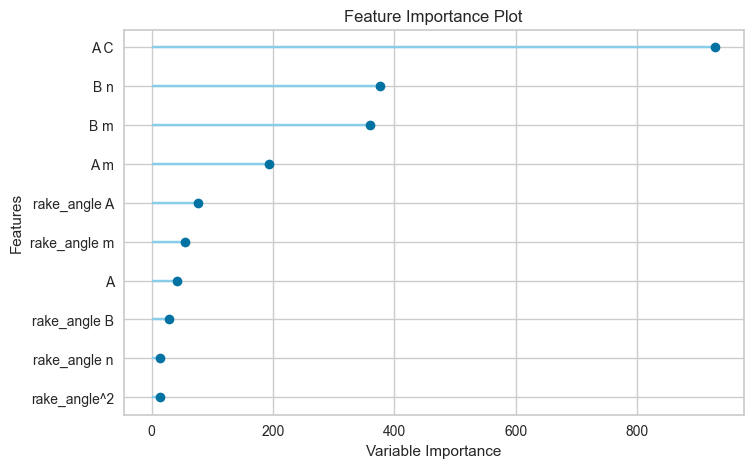

In [14]:
setup_2.plot_model(lasso,"feature")

In [15]:
lasso.feature_names_in_

array(['vc', 'A', 'vc A', 'vc B', 'vc C', 'vc n', 'vc m', 'rake_angle^2',
       'rake_angle A', 'rake_angle B', 'rake_angle n', 'rake_angle m',
       'A B', 'A C', 'A m', 'B n', 'B m', 'n^2', 'n m'], dtype=object)

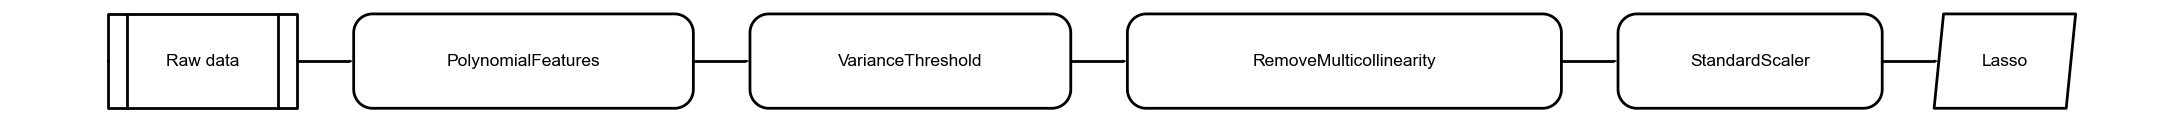

In [16]:
setup_2.plot_model(lasso,"pipeline")

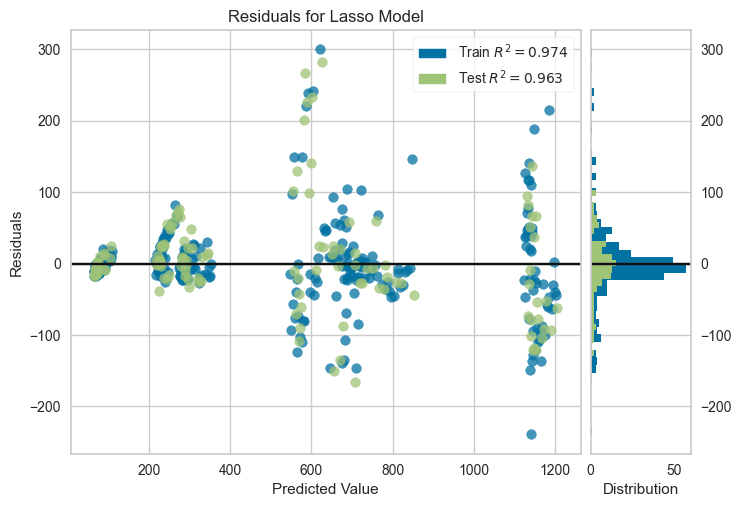

In [17]:
setup_2.plot_model(lasso, plot='residuals')

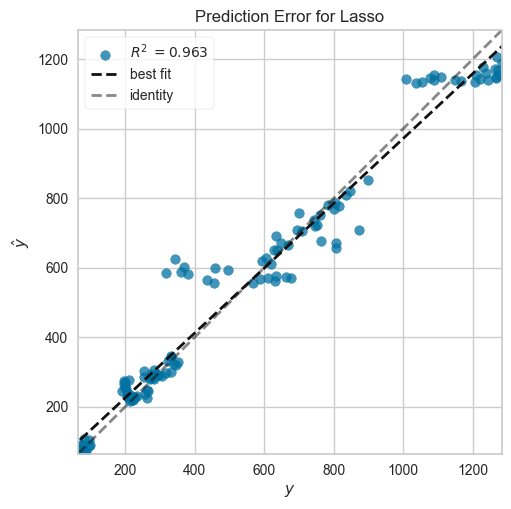

In [18]:
setup_2.plot_model(lasso, plot='error')

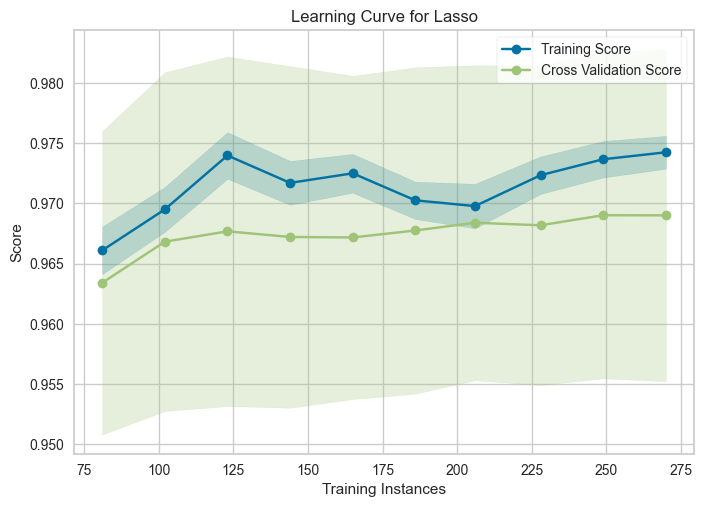

In [19]:
setup_2.plot_model(lasso, plot='learning')

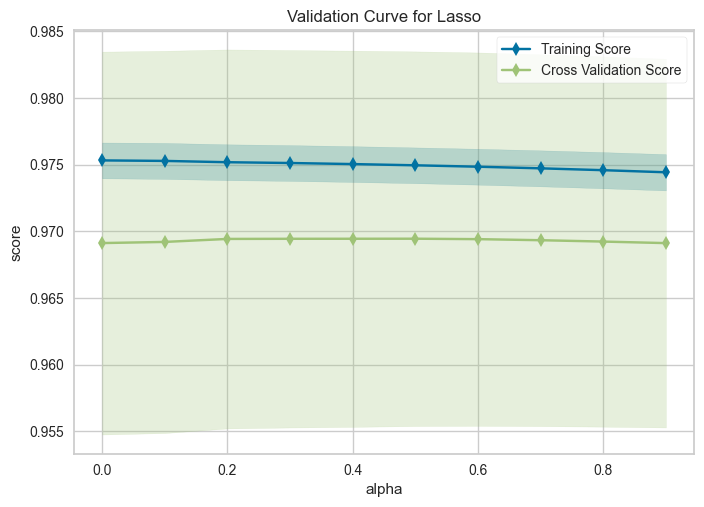

In [20]:
setup_2.plot_model(lasso, plot='vc')

In [21]:
setup_2.tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.7381,1537.7590,39.2143,0.9880,0.0975,0.0771
1,33.7919,3430.9754,58.5745,0.9775,0.1349,0.0952
2,48.9207,4765.2419,69.0307,0.9680,0.1197,0.0952
3,36.1952,4661.8344,68.2776,0.9583,0.1535,0.1019
4,34.8857,3884.3213,62.3243,0.9745,0.0915,0.0708
5,33.6194,2951.1044,54.3241,0.9803,0.0964,0.0678
6,46.3033,7175.5566,84.7087,0.9370,0.1560,0.1017
7,41.2107,3560.1018,59.6666,0.9767,0.0912,0.0719
8,44.6516,5841.7626,76.4314,0.9548,0.1396,0.1014


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Lasso(alpha=0.1, random_state=521)

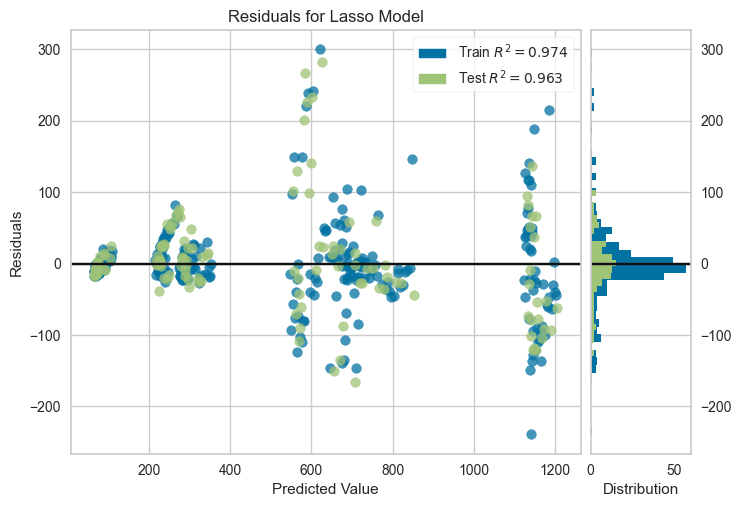

In [22]:
setup_2.plot_model(lasso,"residuals")

In [23]:
setup_2.plot_model(lasso,"parameter")

,Parameters
alpha,1.0
copy_X,True
fit_intercept,True
max_iter,1000
positive,False
precompute,False
random_state,521
selection,cyclic
tol,0.0001
warm_start,False


In [24]:
setup_2.X

,vc,rake_angle,A,B,C,n,m
368,1500,-10,310.000000,1000.0,0.0700,0.650,1.000
376,1500,14,310.000000,1000.0,0.0700,0.650,1.000
448,1500,14,213.000000,53.0,0.0055,0.340,0.810
34,2500,14,553.000000,600.0,0.0134,0.234,1.000
56,4000,-1,553.000000,600.0,0.0134,0.234,1.000
...,...,...,...,...,...,...,...
327,3000,2,774.780029,134.0,0.0018,0.370,3.171
242,2500,-10,792.000000,510.0,0.0140,1.030,0.260
320,2500,8,774.780029,134.0,0.0018,0.370,3.171
189,3500,-7,595.000000,580.0,0.0230,0.133,1.030


In [25]:
setup_2.data.iloc[[0]]

,vc,rake_angle,A,B,C,n,m,expected_cut_force
368,1500,-10,310.0,1000.0,0.07,0.65,1.0,852.78949


In [26]:
lasso.n_features_in_

19

In [27]:
lasso

Lasso(random_state=521)

In [28]:
setup_2.save_model(lasso,"models/lasso_v0",model_only=False,verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=VarianceThreshold(threshold=0.01))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', Lasso(random_state=521))]),
 'models/lasso_v0.pkl')

In [29]:
setup_2.pipeline

Pipeline(memory=FastMemory(location=/var/folders/2s/cs8mfyhj5574qvbcn_50k7r00000gp/T/joblib),
         steps=[('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0.01))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('normalize',
                 TransformerWrapper(transformer=StandardScaler()))])

In [30]:
setup_2.pipeline.transform(setup_2.train)

,vc,A,expected_cut_force,vc A,vc B,vc C,vc n,vc m,rake_angle^2,rake_angle A,rake_angle B,rake_angle n,rake_angle m,A B,A C,A m,B n,B m,n^2,n m
368,-1.060767,-1.004937,852.789490,-1.084096,0.180076,0.610791,-0.273092,-0.591783,0.546619,-0.957916,-2.417030,-1.725249,-1.054422,0.445435,1.649890,-0.511631,1.595068,1.616039,0.352248,0.512385
376,-1.060767,-1.004937,638.878052,-1.084096,0.180076,0.610791,-0.273092,-0.591783,2.096982,0.687461,2.796197,1.820661,0.922812,0.445435,1.649890,-0.511631,1.595068,1.616039,0.352248,0.512385
448,-1.060767,-1.446810,75.510216,-1.245613,-1.117887,-0.701819,-0.714428,-0.685442,2.096982,0.387136,-0.083676,0.834171,0.703669,-1.640871,-1.130909,-0.683208,-0.901170,-1.312806,-0.512808,-0.528566
34,-0.187194,0.102023,199.209381,-0.065595,0.180076,-0.359251,-0.643244,-0.263156,2.096982,1.439823,1.579777,0.496855,0.922812,0.597694,-0.285812,-0.208342,-0.417785,0.391951,-0.684309,-0.643610
56,1.123165,0.102023,202.678635,0.855218,1.002439,-0.086554,-0.310107,0.229785,-1.052193,-0.394639,-0.375183,-0.300975,-0.312959,0.597694,-0.285812,-0.208342,-0.417785,0.391951,-0.684309,-0.643610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-1.497553,1.190761,611.105042,-0.721099,-0.724523,-0.623808,-0.220890,-0.999281,-0.277011,-1.498413,-1.020320,-1.886633,-0.380514,1.101406,0.212384,-0.641534,1.102520,-1.038396,2.151700,-0.549685
498,1.559951,-1.446810,75.304756,-0.536270,-0.972603,-0.477963,0.253665,0.113123,-1.003744,-0.178131,-0.221827,-0.093221,-0.097111,-1.640871,-1.130909,-0.683208,-0.901170,-1.312806,-0.512808,-0.528566
178,-0.187194,0.293349,1225.463867,0.050963,0.134389,-0.033643,-0.882895,-0.238509,2.096982,1.569861,1.518956,0.175450,0.957414,0.690586,0.564175,-0.133643,-0.667654,0.383995,-0.788789,-0.913184
47,0.686379,0.102023,218.407990,0.548280,0.728318,-0.177453,-0.421153,0.065472,-1.052193,-0.394639,-0.375183,-0.300975,-0.312959,0.597694,-0.285812,-0.208342,-0.417785,0.391951,-0.684309,-0.643610


In [31]:
lasso.feature_names_in_

array(['vc', 'A', 'vc A', 'vc B', 'vc C', 'vc n', 'vc m', 'rake_angle^2',
       'rake_angle A', 'rake_angle B', 'rake_angle n', 'rake_angle m',
       'A B', 'A C', 'A m', 'B n', 'B m', 'n^2', 'n m'], dtype=object)

##### Investigação do p-valor dos coeficientes do LASSO

In [32]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config

set_config(transform_output="pandas")

pipeline=Pipeline([("poly",PolynomialFeatures(include_bias=False)),
                   ("variance",VarianceThreshold(threshold=0.01)),
                   ("scaler",StandardScaler())])
model=Lasso(random_state=4292)

train_X=pd.DataFrame(pipeline.fit_transform(setup_2.train.drop("expected_cut_force",axis=1)),
                   columns=pipeline["scaler"].get_feature_names_out())[lasso.feature_names_in_]
train_y=setup_2.train[["expected_cut_force"]]

test_X=pd.DataFrame(pipeline.transform(setup_2.test.drop("expected_cut_force",axis=1)),
                  columns=pipeline["scaler"].get_feature_names_out())[lasso.feature_names_in_]
test_y=setup_2.test[["expected_cut_force"]]

model.fit(train_X,train_y)

print(f"mean_absolute_error : {mean_absolute_error(test_y,model.predict(test_X))}")
print(f"mean_squared_error : {mean_squared_error(test_y,model.predict(test_X))}")
print(f"r2_score : {r2_score(test_y,model.predict(test_X))}")

mean_absolute_error : 47.30178501855968
mean_squared_error : 5261.471055516739
r2_score : 0.9631845515079502


In [33]:
import statsmodels.api as sm
 
# adding the constant term
x = pd.DataFrame(sm.add_constant(train_X),columns=["const"]+list(train_X.columns))
 
# performing the regression
# and fitting the model
#result = sm.OLS(train_y, x).fit_regularized(alpha=1,L1_wt=1)
model = sm.OLS(train_y, x)
result=model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     expected_cut_force   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     696.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          3.19e-217
Time:                        19:16:54   Log-Likelihood:                -1654.2
No. Observations:                 301   AIC:                             3342.
Df Residuals:                     284   BIC:                             3405.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          522.1531      3.498    149.280      0.000     515.268     529.038
vc               5.3582     12.409      0.432      0.666     -19.066      29.783
A              172.1791      7.297     23.596      0.000     157.816     186.542
vc A            45.4567     38.558      1.179      0.239     -30.440     121.353
vc B           -49.1478     54.763     -0.897      0.370    -156.941      58.646
vc C            71.4168     55.868      1.278      0.202     -38.550     181.384
vc n           -32.9335     20.820     -1.582      0.115     -73.915       8.048
vc m           -26.3779     23.367     -1.129      0.260     -72.372      19.616
rake_angle^2    14.3406      4.034      3.555      0.000       6.400      22.281
rake_angle A    91.5388      9.947      9.202      0.000      71.959     111.119
rake_angle B   -31.0321      5.927     -5.236      0.000     -42.699     -19.365
rake_angle n   -21.5775      7.552     -2.857      0.005     -36.443      -6.712
rake_angle m   -63.8544      6.686     -9.550      0.000     -77.016     -50.693
A B           -193.4557     14.202    -13.622      0.000    -221.410    -165.502
A C            901.8692     33.837     26.653      0.000     835.265     968.473
A m            181.2250      8.208     22.078      0.000     165.068     197.382
B n           -296.3569     12.729    -23.281      0.000    -321.413    -271.301
B m           -247.4698     14.705    -16.829      0.000    -276.415    -218.525
n^2             14.2968      6.246      2.289      0.023       2.002      26.592
n m           -123.4095      6.307    -19.566      0.000    -135.824    -110.995
==============================================================================
Omnibus:                       93.976   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.508
Skew:                          -1.174   Prob(JB):                    4.16e-108
Kurtosis:                       8.824   Cond. No.                     1.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
import numpy as np
frames = []
#model = sm.OLS(train_y, x)
for n in np.arange(0, 1, 0.05).tolist():
    results_fr = model.fit_regularized(alpha=n,L1_wt=1, start_params=result.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params
                                                        )
    frames.append(np.append(results_fr.params, results_fr_fit.ssr))

    df = pd.DataFrame(frames, columns=list(x.columns) + ['ssr*'])
df.index=np.arange(0, 1, 0.05).tolist()
df.index.name = 'alpha*'
df.T

alpha*,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
const,5.221531e+02,5.221031e+02,5.220531e+02,5.220031e+02,5.219531e+02,5.219031e+02,5.218531e+02,5.218031e+02,5.217531e+02,5.217031e+02,5.216531e+02,5.216031e+02,5.215531e+02,5.215031e+02,5.214531e+02,5.214031e+02,5.213531e+02,5.213031e+02,5.212531e+02,5.212031e+02
vc,5.358236e+00,4.244440e+00,3.130644e+00,2.016848e+00,9.030514e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A,1.721791e+02,1.713655e+02,1.705519e+02,1.697383e+02,1.689247e+02,1.681289e+02,1.673688e+02,1.665974e+02,1.658240e+02,1.650498e+02,1.637685e+02,1.626031e+02,1.614812e+02,1.603690e+02,1.592587e+02,1.581486e+02,1.570383e+02,1.559476e+02,1.549030e+02,1.537796e+02
vc A,4.545666e+01,4.370302e+01,4.194938e+01,4.019574e+01,3.844210e+01,3.652868e+01,3.406487e+01,3.164308e+01,2.923198e+01,2.682560e+01,2.463350e+01,2.240710e+01,2.012936e+01,1.782862e+01,1.551654e+01,1.319833e+01,1.087635e+01,8.609292e+00,7.118764e+00,5.843801e+00
vc B,-4.914775e+01,-4.645264e+01,-4.375752e+01,-4.106241e+01,-3.836729e+01,-3.574864e+01,-3.343667e+01,-3.111457e+01,-2.878995e+01,-2.646441e+01,-2.413043e+01,-2.157235e+01,-1.903632e+01,-1.653916e+01,-1.406953e+01,-1.161717e+01,-9.175884e+00,-6.729137e+00,-4.234575e+00,-1.899817e+00
vc C,7.141682e+01,6.867829e+01,6.593975e+01,6.320121e+01,6.046267e+01,5.769350e+01,5.477515e+01,5.185301e+01,4.893101e+01,4.600943e+01,4.298573e+01,3.996504e+01,3.696836e+01,3.398795e+01,3.101680e+01,2.805093e+01,2.508823e+01,2.213474e+01,1.934072e+01,1.666624e+01
vc n,-3.293350e+01,-3.096967e+01,-2.900585e+01,-2.704203e+01,-2.507820e+01,-2.313874e+01,-2.141083e+01,-1.971758e+01,-1.803385e+01,-1.635440e+01,-1.540759e+01,-1.424384e+01,-1.294128e+01,-1.156778e+01,-1.015647e+01,-8.724013e+00,-7.278631e+00,-5.846509e+00,-4.660988e+00,-3.568304e+00
vc m,-2.637791e+01,-2.454244e+01,-2.270697e+01,-2.087151e+01,-1.903604e+01,-1.725327e+01,-1.580286e+01,-1.438169e+01,-1.296782e+01,-1.155714e+01,-9.756589e+00,-8.216779e+00,-6.749706e+00,-5.300460e+00,-3.855741e+00,-2.412086e+00,-9.684790e-01,0.000000e+00,0.000000e+00,0.000000e+00
rake_angle^2,1.434061e+01,1.428290e+01,1.422519e+01,1.416748e+01,1.410977e+01,1.405181e+01,1.399533e+01,1.393910e+01,1.388292e+01,1.382674e+01,1.375528e+01,1.369138e+01,1.363055e+01,1.357062e+01,1.351108e+01,1.345172e+01,1.339248e+01,1.332911e+01,1.329760e+01,1.326109e+01
rake_angle A,9.153878e+01,9.080262e+01,9.006646e+01,8.933030e+01,8.859414e+01,8.786054e+01,8.712205e+01,8.638241e+01,8.564273e+01,8.490306e+01,8.418123e+01,8.344814e+01,8.271755e+01,8.198694e+01,8.125561e+01,8.052363e+01,7.979116e+01,7.904450e+01,7.821918e+01,7.743019e+01


In [35]:
results_fr = model.fit_regularized(L1_wt=1, alpha=1, start_params=result.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params
                                              )

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     expected_cut_force   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     655.3
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          1.47e-213
Time:                        19:16:56   Log-Likelihood:                -1663.1
No. Observations:                 301   AIC:                             3360.
Df Residuals:                     284   BIC:                             3423.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          521.1531      3.603    144.629      0.000     514.060     528.246
vc                    0     12.783          0      1.000     -25.162      25.162
A              152.6313      7.517     20.304      0.000     137.835     167.428
vc A             4.6628     39.722      0.117      0.907     -73.524      82.850
vc B                  0     56.416          0      1.000    -111.047     111.047
vc C            14.3610     57.554      0.250      0.803     -98.925     127.647
vc n            -2.4954     21.448     -0.116      0.907     -44.713      39.723
vc m                  0     24.072          0      1.000     -47.382      47.382
rake_angle^2    13.2165      4.156      3.180      0.002       5.036      21.397
rake_angle A    76.6546     10.248      7.480      0.000      56.484      96.826
rake_angle B   -28.9387      6.106     -4.739      0.000     -40.958     -16.920
rake_angle n   -14.1347      7.780     -1.817      0.070     -29.449       1.180
rake_angle m   -55.0308      6.888     -7.989      0.000     -68.589     -41.472
A B           -137.9307     14.630     -9.428      0.000    -166.728    -109.133
A C            899.1681     34.859     25.795      0.000     830.554     967.782
A m            149.5275      8.456     17.683      0.000     132.883     166.172
B n           -324.7955     13.113    -24.768      0.000    -350.607    -298.984
B m           -268.2946     15.149    -17.710      0.000    -298.113    -238.476
n^2                   0      6.435          0      1.000     -12.666      12.666
n m            -71.7198      6.498    -11.038      0.000     -84.509     -58.930
==============================================================================
Omnibus:                       61.223   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.787
Skew:                          -0.695   Prob(JB):                     1.33e-70
Kurtosis:                       7.871   Cond. No.                     1.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Excluindo mais variáveis dado a informação de relevância do p-valor

In [38]:
train_X.columns

Index(['vc', 'A', 'vc A', 'vc B', 'vc C', 'vc n', 'vc m', 'rake_angle^2',
       'rake_angle A', 'rake_angle B', 'rake_angle n', 'rake_angle m', 'A B',
       'A C', 'A m', 'B n', 'B m', 'n^2', 'n m'],
      dtype='object')

In [39]:
import statsmodels.api as sm
 
# adding the constant term
x = pd.DataFrame(sm.add_constant(train_X),columns=["const"]+list(train_X.columns))[[
    "A",
    #"young_modulus",
    "rake_angle^2",
    "A B",
    #"A n",
    "B m",
    #"B young_modulus"
]]
 
# performing the regression
# and fitting the model
#result = sm.OLS(train_y, x).fit_regularized(alpha=1,L1_wt=1)
model = sm.OLS(train_y, x)
result=model.fit()

In [40]:
results_fr = model.fit_regularized(L1_wt=1, alpha=1, start_params=result.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params
                                              )

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     expected_cut_force   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.150
Method:                 Least Squares   F-statistic:                              14.27
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                    1.14e-10
Time:                        19:20:24   Log-Likelihood:                         -2346.6
No. Observations:                 301   AIC:                                      4701.
Df Residuals:                     297   BIC:                                      4716.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
A               11.0339     40.557      0.272      0.786     -68.783      90.850
rake_angle^2    12.7517     34.132      0.374      0.709     -54.419      79.922
A B            201.7288     44.492      4.534      0.000     114.170     289.288
B m             88.6878     41.367      2.144      0.033       7.278     170.098
==============================================================================
Omnibus:                        2.444   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.172
Skew:                           0.196   Prob(JB):                        0.338
Kurtosis:                       3.137   Cond. No.                         2.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Investigando LightGBM

In [41]:
lgbm=create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.2676,2574.6697,50.7412,0.9834,0.1474,0.1069
1,38.4008,4245.9796,65.1612,0.9597,0.1002,0.0757
2,83.5628,14667.5006,121.1095,0.9053,0.2011,0.1479
3,70.5580,13860.4439,117.7304,0.9269,0.1480,0.1089
4,77.2836,25843.5143,160.7592,0.8382,0.2015,0.1111
5,45.1220,7633.6041,87.3705,0.9483,0.1220,0.0909
6,37.2397,4295.2305,65.5380,0.9739,0.1215,0.0799
7,43.9430,4937.8650,70.2699,0.9567,0.1227,0.0792
8,93.1296,24963.9996,158.0000,0.6614,0.3298,0.2238


In [42]:
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.2676,2574.6697,50.7412,0.9834,0.1474,0.1069
1,38.4008,4245.9796,65.1612,0.9597,0.1002,0.0757
2,83.5628,14667.5006,121.1095,0.9053,0.2011,0.1479
3,70.5580,13860.4439,117.7304,0.9269,0.1480,0.1089
4,77.2836,25843.5143,160.7592,0.8382,0.2015,0.1111
5,45.1220,7633.6041,87.3705,0.9483,0.1220,0.0909
6,37.2397,4295.2305,65.5380,0.9739,0.1215,0.0799
7,43.9430,4937.8650,70.2699,0.9567,0.1227,0.0792
8,93.1296,24963.9996,158.0000,0.6614,0.3298,0.2238


In [43]:
lgbm

LGBMRegressor(n_jobs=-1, random_state=7281)

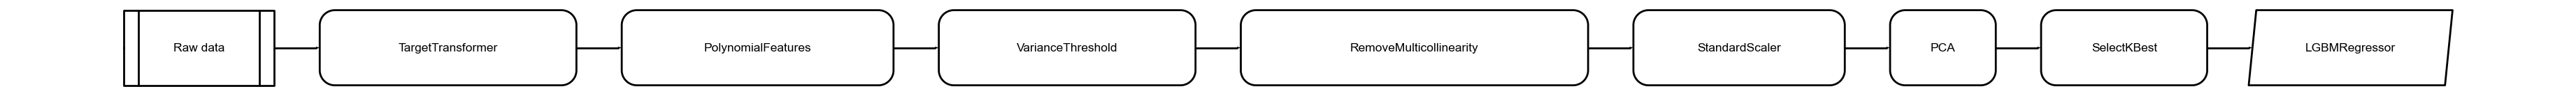

In [44]:
plot_model(lgbm, "pipeline")

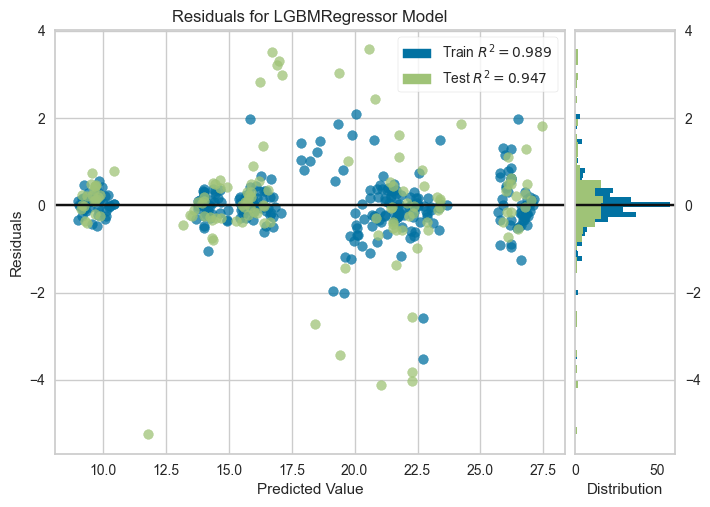

In [45]:
plot_model(lgbm, plot='residuals')

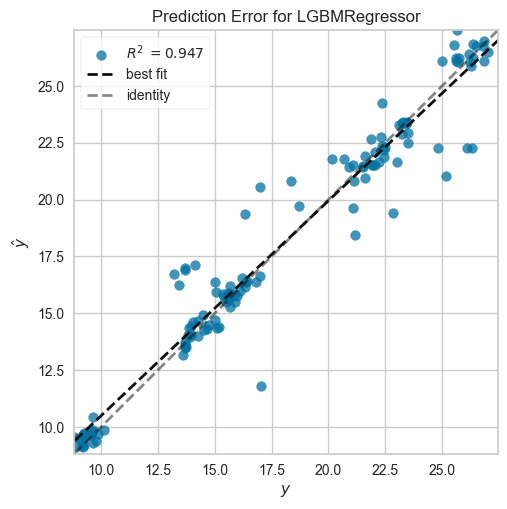

In [46]:
plot_model(lgbm, plot='error')

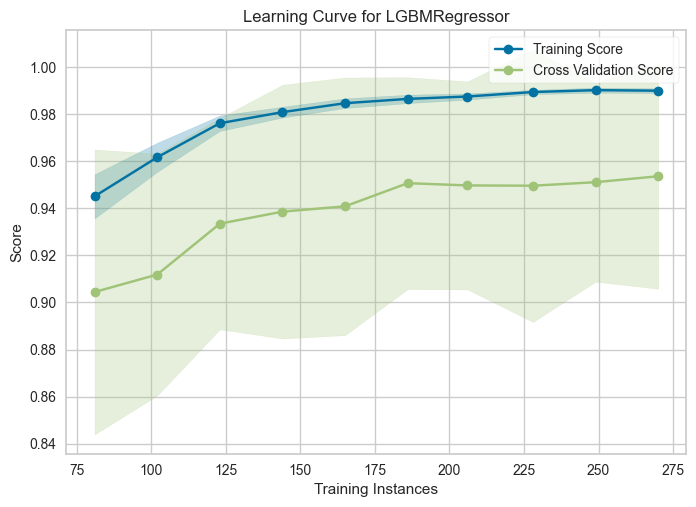

In [47]:
plot_model(lgbm, plot='learning')

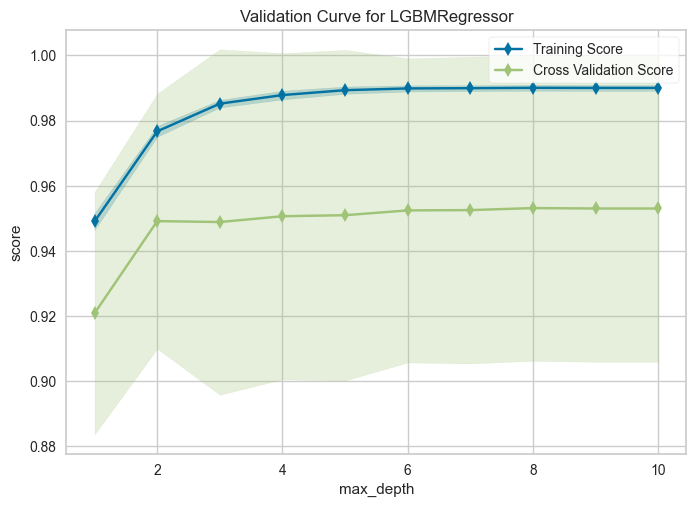

In [48]:
plot_model(lgbm, plot='vc')

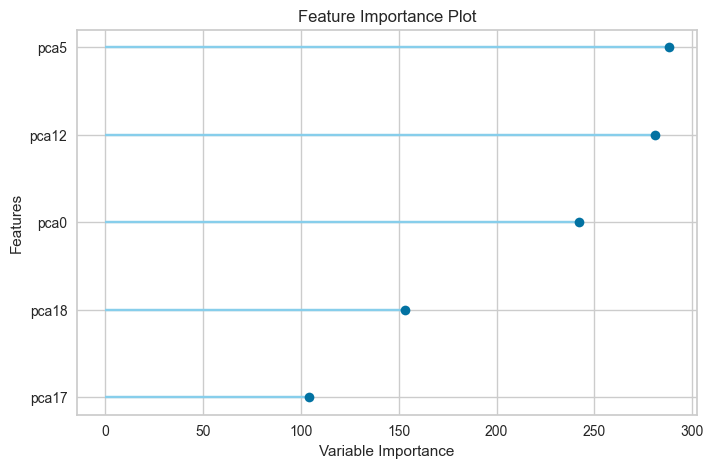

In [49]:
plot_model(lgbm, plot='feature')

In [50]:
save_model(lgbm,"models/lgbm_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=VarianceThreshold(...
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('pca', TransformerWrapper(exclude=[], transformer=PCA())),
                 ('feature_selection',
                  TransformerWrapper(exclude=[],
                                     transformer=SelectKBest(k=5,
                                                             score_func=<function f_regression at 0

# Modelagem sem polynomial features

In [23]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:53:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,345.5288,233758.6752,477.7977,0.9578,0.1014,0.0785,0.0330
gbr,Gradient Boosting Regressor,355.1062,256031.3986,497.6145,0.9542,0.0986,0.0766,0.0370
knn,K Neighbors Regressor,358.5508,249965.3266,494.9110,0.9540,0.1015,0.0782,0.0140
catboost,CatBoost Regressor,359.7647,281506.1228,521.5496,0.9508,0.1045,0.0781,0.1510
llar,Lasso Least Angle Regression,383.8108,267076.2375,507.3246,0.9497,0.1094,0.0874,0.0120
lr,Linear Regression,383.7722,266980.1328,507.1040,0.9496,0.1092,0.0873,0.0470
lasso,Lasso Regression,385.0282,267595.6594,508.0514,0.9496,0.1111,0.0888,0.4040
rf,Random Forest Regressor,345.4601,279497.0385,520.2474,0.9496,0.1012,0.0733,0.0320
xgboost,Extreme Gradient Boosting,374.4546,316721.3094,550.4610,0.9447,0.1088,0.0797,0.1960
et,Extra Trees Regressor,372.6379,320550.2556,553.3668,0.9436,0.1071,0.0780,0.0300


## Investigando Lasso

In [24]:
lasso=create_model("lasso")
lasso

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:55:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,307.1633,198336.4844,445.3499,0.9585,0.0934,0.0692
1,386.8020,250652.5625,500.6521,0.9671,0.0869,0.0733
2,362.7656,244445.5625,494.4144,0.9566,0.0904,0.0648
3,293.5306,157825.7969,397.2729,0.9685,0.1005,0.0773
4,443.0511,349961.6875,591.5756,0.9625,0.1180,0.0987
5,380.0340,288097.6250,536.7473,0.9397,0.1246,0.0977
6,557.7722,535782.8125,731.9719,0.8273,0.1415,0.1164
7,307.1191,148188.7656,384.9529,0.9766,0.0925,0.0805
8,434.5976,301634.8438,549.2130,0.9622,0.1078,0.0866


Lasso(random_state=1831)

In [25]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

A : 22.0549
B : 3.1327
m : 6569.6982


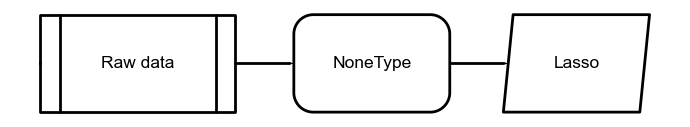

In [26]:
plot_model(lasso,"pipeline")

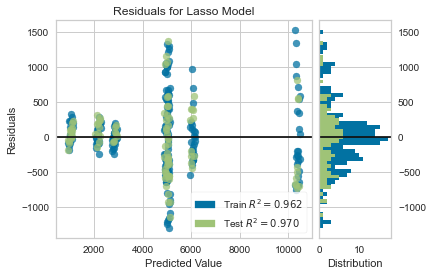

In [27]:
plot_model(lasso, plot='residuals')

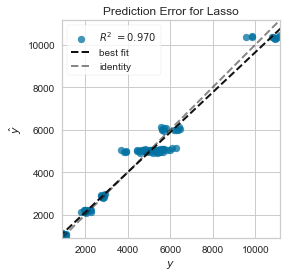

In [28]:
plot_model(lasso, plot='error')

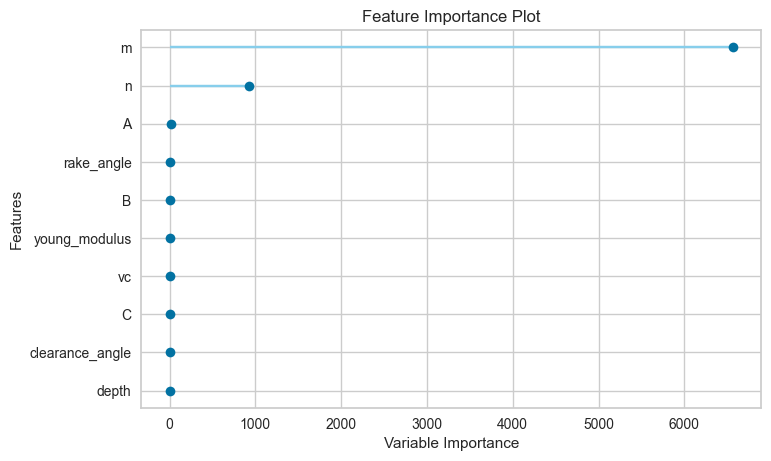

In [29]:
plot_model(lasso, plot='feature')

In [30]:
save_model(lasso,"models/lasso_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ('trained_model', Lasso(random_state=1831))]),
 'models/lasso_v1.pkl')

## Investigando LightGBM

In [87]:
lgbm=setup_1.create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.0417,1209.1363,34.7726,0.9907,0.0655,0.0483
1,35.7989,4032.4012,63.5012,0.9682,0.1235,0.0829
2,26.7908,1684.6816,41.0449,0.9895,0.0749,0.0603
3,31.4898,3007.6172,54.8417,0.9789,0.0764,0.0572
4,41.6784,4800.1134,69.2829,0.9553,0.1217,0.0829
5,37.4670,5889.0995,76.7405,0.9627,0.0952,0.0697
6,38.4260,3229.0215,56.8245,0.9745,0.1211,0.0778
7,31.5004,2117.9786,46.0215,0.9866,0.0709,0.0540
8,29.4137,2223.3895,47.1528,0.9827,0.0967,0.0680


In [88]:
lgbm

LGBMRegressor(n_jobs=-1, random_state=1064)

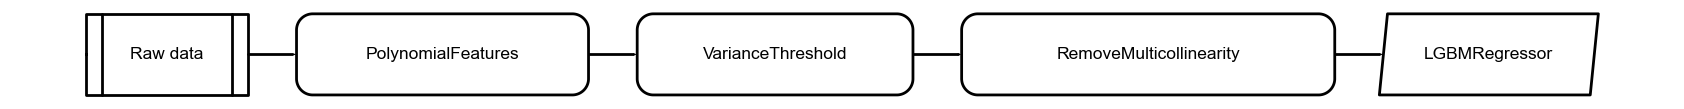

In [93]:
setup_1.plot_model(lgbm, "pipeline")

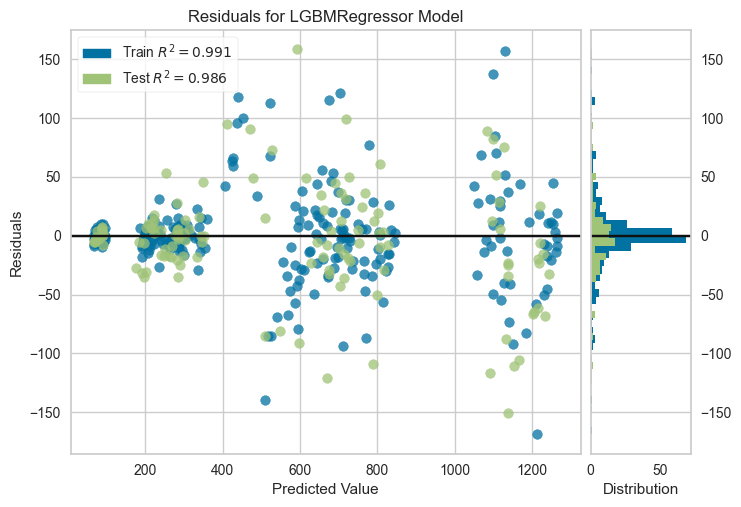

In [92]:
setup_1.plot_model(lgbm, plot='residuals')

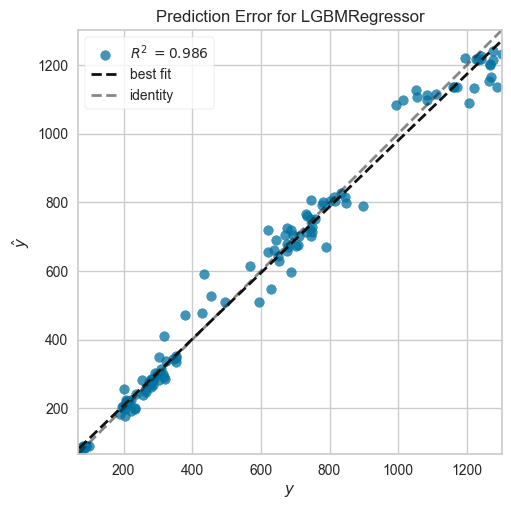

In [94]:
setup_1.plot_model(lgbm, plot='error')

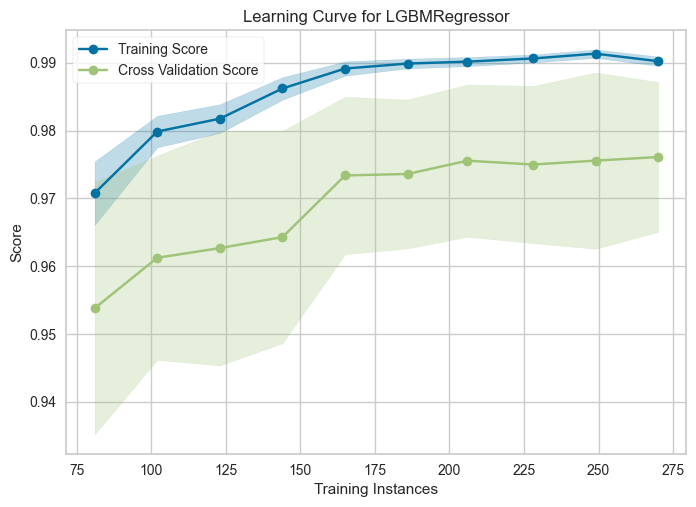

In [95]:
setup_1.plot_model(lgbm, plot='learning')

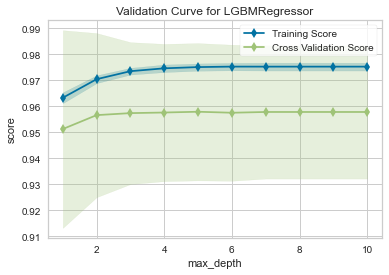

In [37]:
plot_model(lgbm, plot='vc')

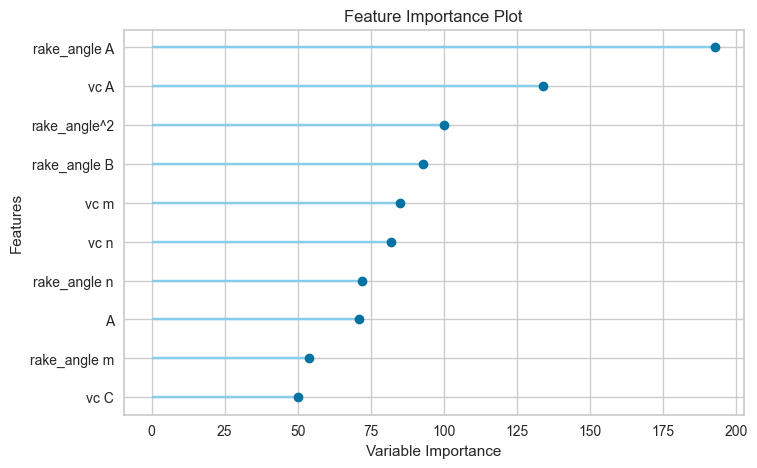

In [96]:
setup_1.plot_model(lgbm, plot='feature')

In [106]:
lgbm.feature_names_in_

array(['A', 'vc^2', 'vc_A', 'vc_B', 'vc_C', 'vc_n', 'vc_m',
       'rake_angle^2', 'rake_angle_A', 'rake_angle_B', 'rake_angle_n',
       'rake_angle_m', 'A_B', 'A_C', 'A_m', 'B_n', 'B_m', 'n^2'],
      dtype='<U12')

In [107]:
lgbm.feature_importances_

array([ 71,  23, 134,  50,  50,  82,  85, 100, 193,  93,  72,  54,  15,
        47,   0,   7,   1,   3], dtype=int32)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

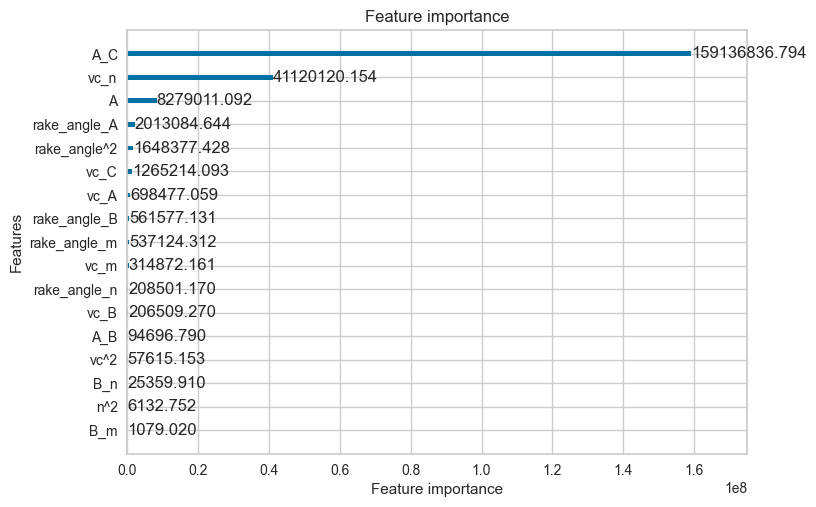

In [110]:
import lightgbm 
lightgbm.plot_importance(lgbm, importance_type="gain")

In [112]:
save_model(lgbm,"models/lgbm_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=VarianceThreshold(...
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('pca', TransformerWrapper(exclude=[], transformer=PCA())),
                 ('feature_selection',
                  TransformerWrapper(exclude=[],
                                     transformer=SelectKBest(k=5,
                                                             score_func=<function f_regression at 0

# Modelagem com polynomial features mas filtrando variáveis do material

In [40]:
df_1.columns

Index(['depth', 'vc', 'rake_angle', 'clearance_angle', 'expected_cut_force',
       'A', 'B', 'C', 'n', 'm', 'young_modulus', 'poisson_coef'],
      dtype='object')

In [41]:
df_2=df_1.drop([ 'A', 'B', 'C', 'n', 'm',],axis=1)

,Description,Value
0,Session id,5343
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(324, 7)"
4,Transformed data shape,"(324, 7)"
5,Transformed train set shape,"(226, 7)"
6,Transformed test set shape,"(98, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,None


In [51]:
best = compare_models()

## Investigando Lasso

In [53]:
lasso=create_model("lasso")
lasso

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:30:09
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1485.0612,3735265.5000,1932.6835,0.4305,0.5501,0.5831
1,1573.9053,3968244.7500,1992.0454,0.0280,0.4681,0.4491
2,2352.0972,7559852.5000,2749.5186,0.2053,0.6107,0.6523
3,1710.3486,4341016.5000,2083.5105,0.3853,0.4182,0.3846
4,1649.2773,4021302.5000,2005.3186,-0.0539,0.5797,0.6216
5,1897.0509,6156286.0000,2481.1865,0.0462,0.5173,0.5322
6,2022.8251,6318448.0000,2513.6523,0.2874,0.4952,0.4891
7,1671.9696,4924861.5000,2219.2029,0.0484,0.4365,0.4188
8,1643.0476,4532926.0000,2129.0669,0.2030,0.4640,0.4274


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Lasso(random_state=5343)

In [54]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

vc : 0.0017
young_modulus : 0.3368


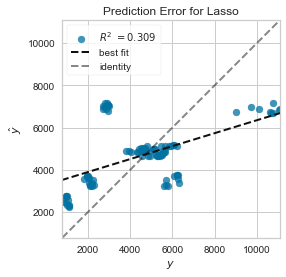

In [57]:
plot_model(lasso, plot='error')

## Investigando LightGBM

In [58]:
lgbm=create_model("lightgbm")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:30:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


In [59]:
lgbm

LGBMRegressor(random_state=5343)

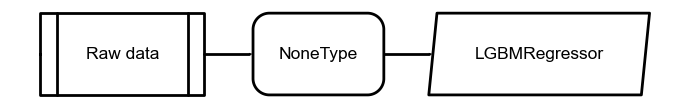

In [60]:
plot_model(lgbm, "pipeline")

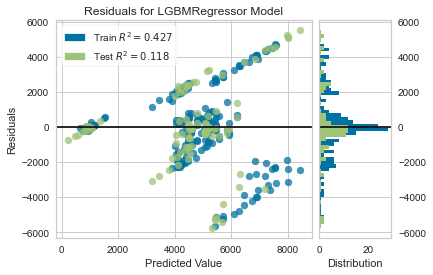

In [61]:
plot_model(lgbm, plot='residuals')

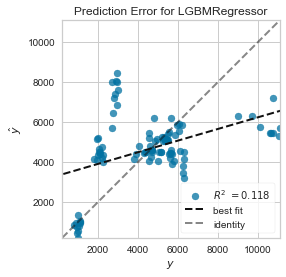

In [62]:
plot_model(lgbm, plot='error')